In [1]:
#Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import os

In [2]:
os.chdir("/Users/adityaraj/Desktop/Data Mining and Machine Learning Folder/Project/Final/")

In [3]:
#Read Data
germany=pd.read_csv("germany_housing_data_14.07.2020.csv")
germany.shape

(10552, 26)

In [4]:
germany.head(15)

,Unnamed: 0,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage
5,5,1400000.0,Mid-terrace house,310.00,860.0,100.00,sofort,8.0,NaN,NaN,...,Öl,available,consumption certificate,NaN,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage
6,6,3500000.0,Duplex,502.00,5300.0,163.16,nach Absprache,13.0,NaN,4.0,...,"Erdwärme, Holzpellets",available,consumption certificate,35.9,A,Baden-Württemberg,Göppingen (Kreis),Wangen,7.0,Parking lot
7,7,630000.0,Duplex,263.00,406.0,118.00,01.04.2020,10.0,NaN,NaN,...,Gas,available,demand certificate,NaN,E,Baden-Württemberg,Freiburg im Breisgau,Munzingen,2.0,Garage
8,8,364000.0,Duplex,227.00,973.0,83.00,nach Absprache,10.0,4.0,4.0,...,Strom,available,consumption certificate,183.1,F,Baden-Württemberg,Enzkreis,Neuenbürg,8.0,Parking lot
9,9,1900000.0,Duplex,787.00,933.0,NaN,NaN,30.0,NaN,NaN,...,"Gas, Fernwärme-Dampf",available,demand certificate,NaN,D,Baden-Württemberg,Mannheim,Rheinau,12.0,Parking lot


In [5]:
#Remove irrelevant columns from the dataframe
germany.drop(['Unnamed: 0'], axis='columns', inplace=True)
germany.head(15)

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage
5,1400000.0,Mid-terrace house,310.00,860.0,100.00,sofort,8.0,NaN,NaN,3.0,...,Öl,available,consumption certificate,NaN,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage
6,3500000.0,Duplex,502.00,5300.0,163.16,nach Absprache,13.0,NaN,4.0,NaN,...,"Erdwärme, Holzpellets",available,consumption certificate,35.9,A,Baden-Württemberg,Göppingen (Kreis),Wangen,7.0,Parking lot
7,630000.0,Duplex,263.00,406.0,118.00,01.04.2020,10.0,NaN,NaN,3.0,...,Gas,available,demand certificate,NaN,E,Baden-Württemberg,Freiburg im Breisgau,Munzingen,2.0,Garage
8,364000.0,Duplex,227.00,973.0,83.00,nach Absprache,10.0,4.0,4.0,2.0,...,Strom,available,consumption certificate,183.1,F,Baden-Württemberg,Enzkreis,Neuenbürg,8.0,Parking lot
9,1900000.0,Duplex,787.00,933.0,NaN,NaN,30.0,NaN,NaN,3.0,...,"Gas, Fernwärme-Dampf",available,demand certificate,NaN,D,Baden-Württemberg,Mannheim,Rheinau,12.0,Parking lot


In [6]:
#Analyze all the attributes with pandas profiling
#germany_analysis=pp.ProfileReport(germany)
#germany_analysis.to_file(r'C:\Users\Pratiksha Chate\Desktop\Books\Data_Mining\Project\ADUUUUU\Germany_analysis.html')

In [7]:
print("Missing Data : \n\n", germany.isnull().sum())

Missing Data : 

 Price                         0
Type                        402
Living_space                  0
Lot                           0
Usable_area                4984
Free_of_Relation           3569
Rooms                         0
Bedrooms                   3674
Bathrooms                  1801
Floors                     2664
Year_built                  694
Furnishing_quality         2726
Year_renovated             5203
Condition                   323
Heating                     584
Energy_source              1227
Energy_certificate          755
Energy_certificate_type    3526
Energy_consumption         8119
Energy_efficiency_class    4819
State                         1
City                          1
Place                       290
Garages                    1960
Garagetype                 1960
dtype: int64


In [8]:
germany.shape

(10552, 25)

<AxesSubplot:>

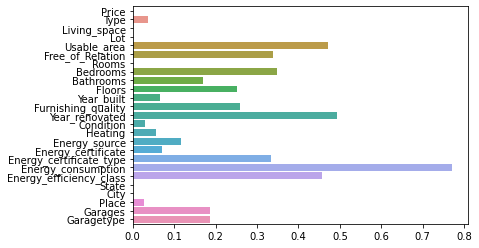

In [9]:
#Barplot for missing data
sns.barplot(x=germany.isnull().sum()/10552, y=germany.columns)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bedrooms', ylabel='count'>

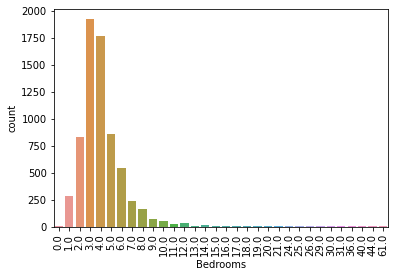

In [10]:
#Bedrooms
plt.xticks(rotation=90)
sns.countplot(germany.Bedrooms)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathrooms', ylabel='count'>

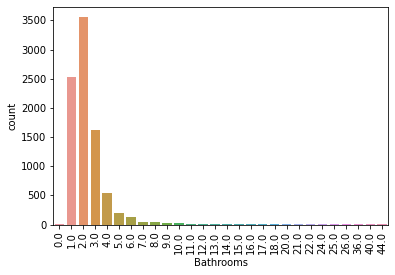

In [11]:
#Bathrooms
plt.xticks(rotation=90)
sns.countplot(germany.Bathrooms)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Floors', ylabel='count'>

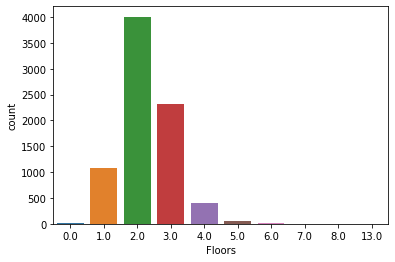

In [12]:
#Floors
sns.countplot(germany.Floors)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garages', ylabel='count'>

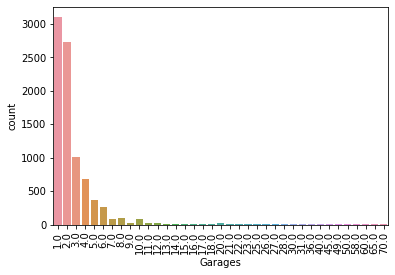

In [13]:
#Garage
plt.xticks(rotation=90)
sns.countplot(germany.Garages)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

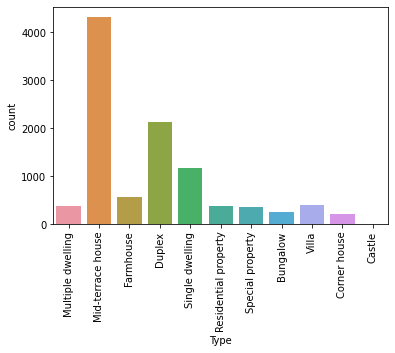

In [14]:
#Type
plt.xticks(rotation=90)
sns.countplot(germany.Type)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Heating', ylabel='count'>

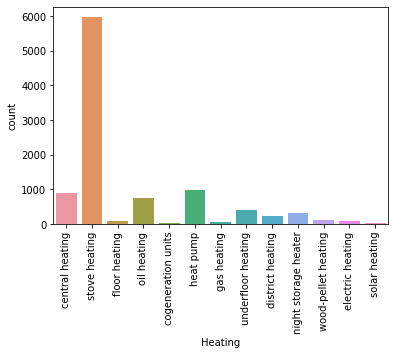

In [15]:
#Heating
plt.xticks(rotation=90)
sns.countplot(germany.Heating)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

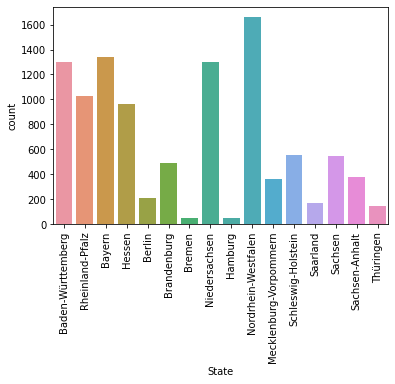

In [16]:
#State
plt.xticks(rotation=90)
sns.countplot(germany.State)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garagetype', ylabel='count'>

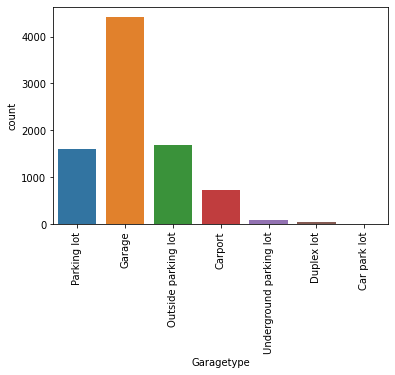

In [17]:
#Garage Type
plt.xticks(rotation=90)
sns.countplot(germany.Garagetype)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Energy_certificate', ylabel='count'>

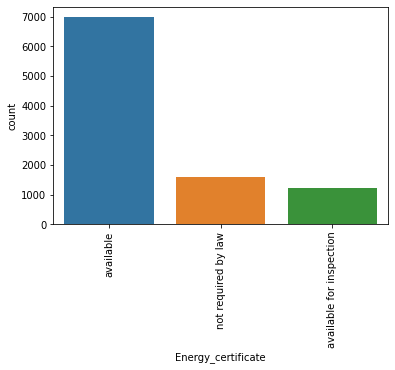

In [18]:
#Data based on Energy certificate
plt.xticks(rotation=90)
sns.countplot(germany.Energy_certificate)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Energy_certificate_type', ylabel='count'>

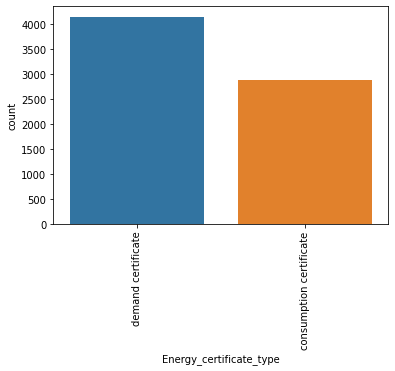

In [19]:
#Type of Certificate
plt.xticks(rotation=90)
sns.countplot(germany.Energy_certificate_type)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Energy_efficiency_class', ylabel='count'>

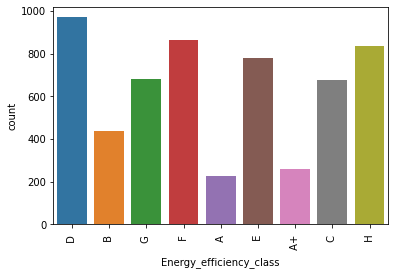

In [20]:
#Energy Efficiency Class
plt.xticks(rotation=90)
sns.countplot(germany.Energy_efficiency_class)

<AxesSubplot:>

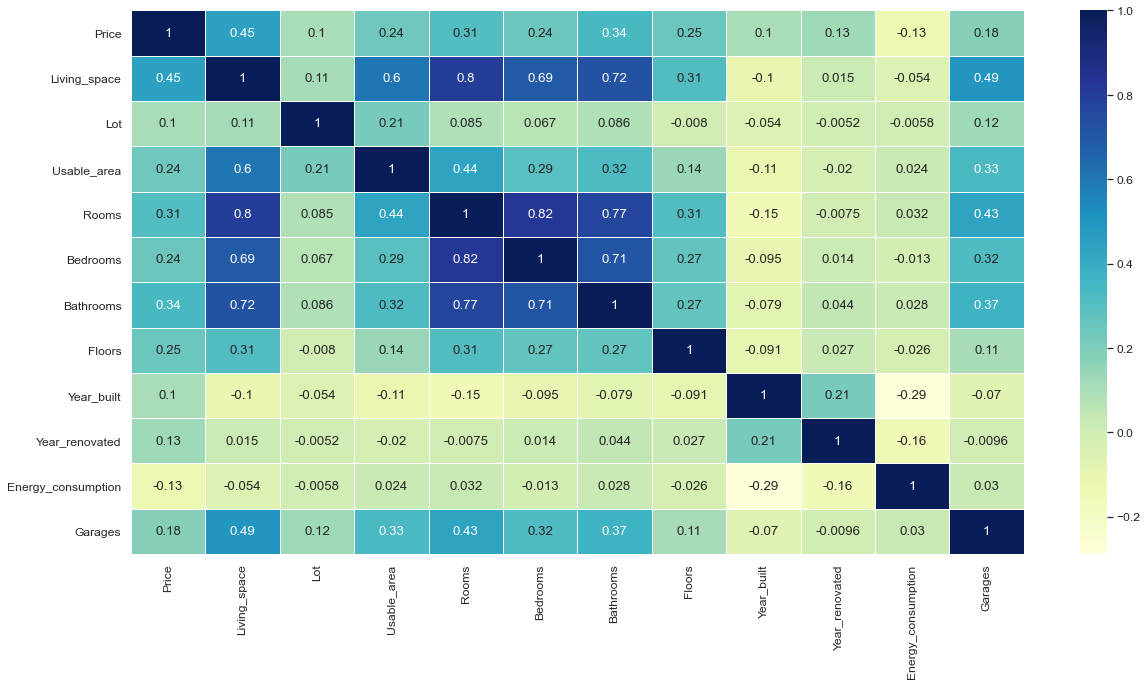

In [21]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(germany.corr(),linewidths=0.5,annot=True,cmap='YlGnBu')

<AxesSubplot:xlabel='Bedrooms', ylabel='Price'>

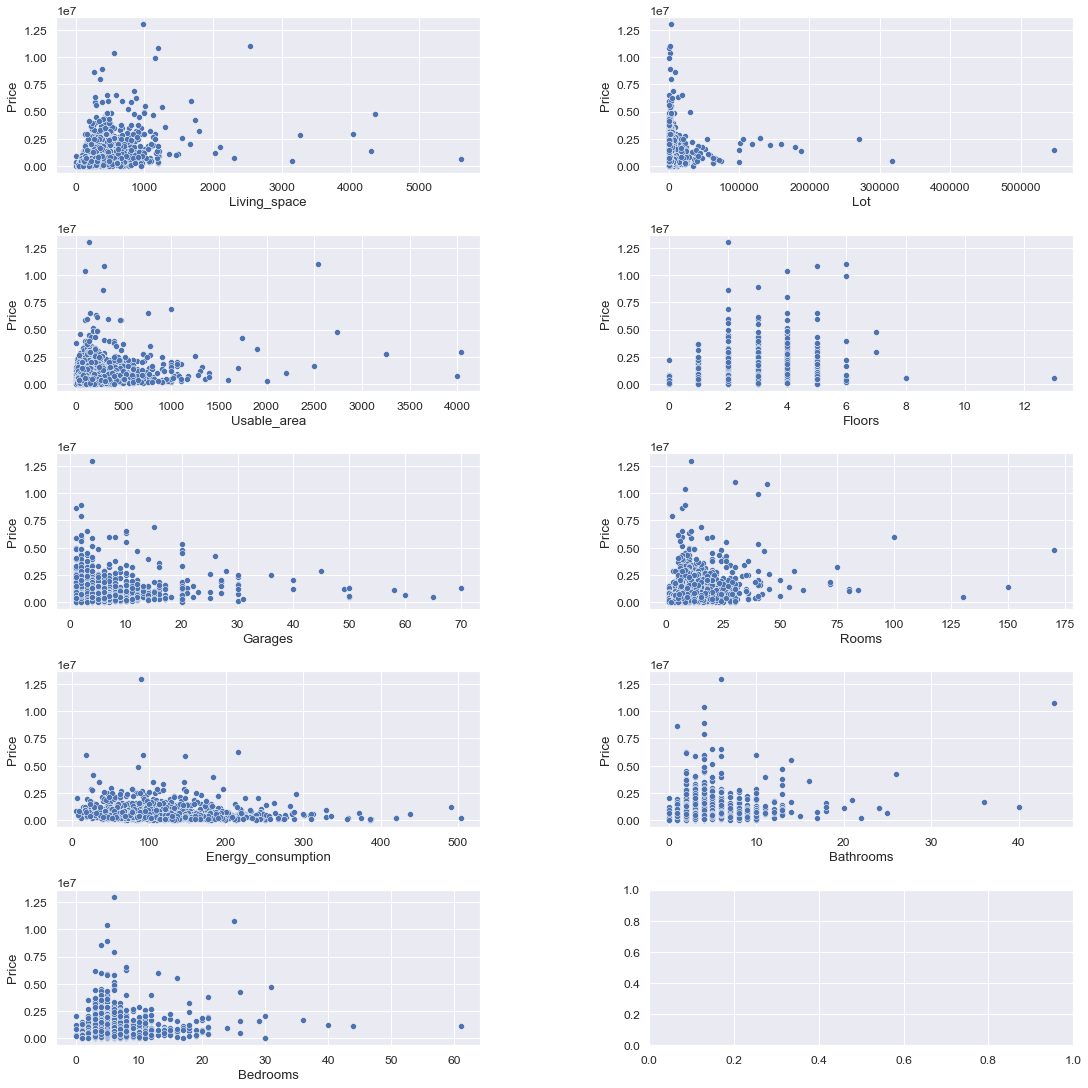

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,15))
fig.tight_layout()
fig.subplots_adjust(wspace=0.4,hspace=0.4)

sns.scatterplot(x='Living_space', y='Price', data=germany,ax = axes[0,0])
sns.scatterplot(x='Lot', y='Price', data=germany, ax = axes[0,1])
sns.scatterplot(x='Usable_area', y='Price', data=germany, ax = axes[1,0])
sns.scatterplot(x='Floors', y='Price', data=germany, ax = axes[1,1])
sns.scatterplot(x='Garages', y='Price', data=germany, ax = axes[2,0])
sns.scatterplot(x='Rooms', y='Price', data=germany, ax = axes[2,1])
sns.scatterplot(x='Energy_consumption', y='Price', data=germany, ax = axes[3,0])
sns.scatterplot(x='Bathrooms', y='Price', data=germany, ax = axes[3,1])
sns.scatterplot(x='Bedrooms', y='Price', data=germany, ax = axes[4,0])

<AxesSubplot:xlabel='State', ylabel='Price'>

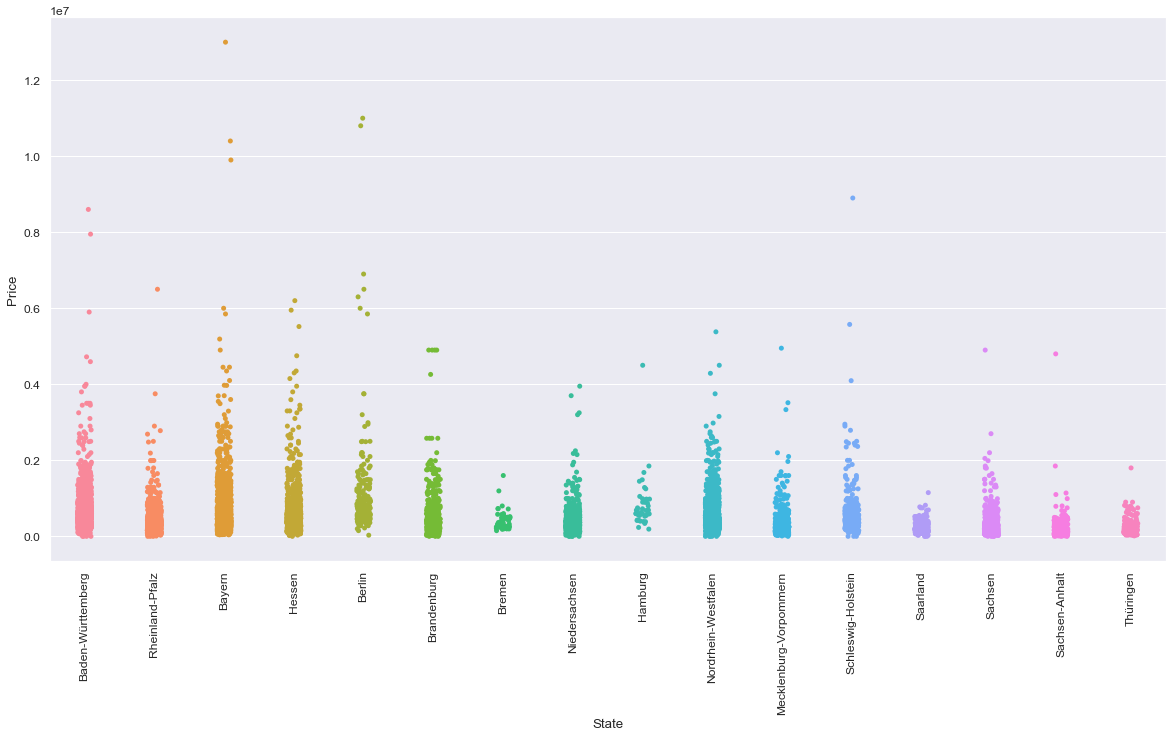

In [23]:
plt.xticks(rotation=90)
sns.stripplot(x='State', y='Price', data=germany)

<AxesSubplot:xlabel='Price', ylabel='State'>

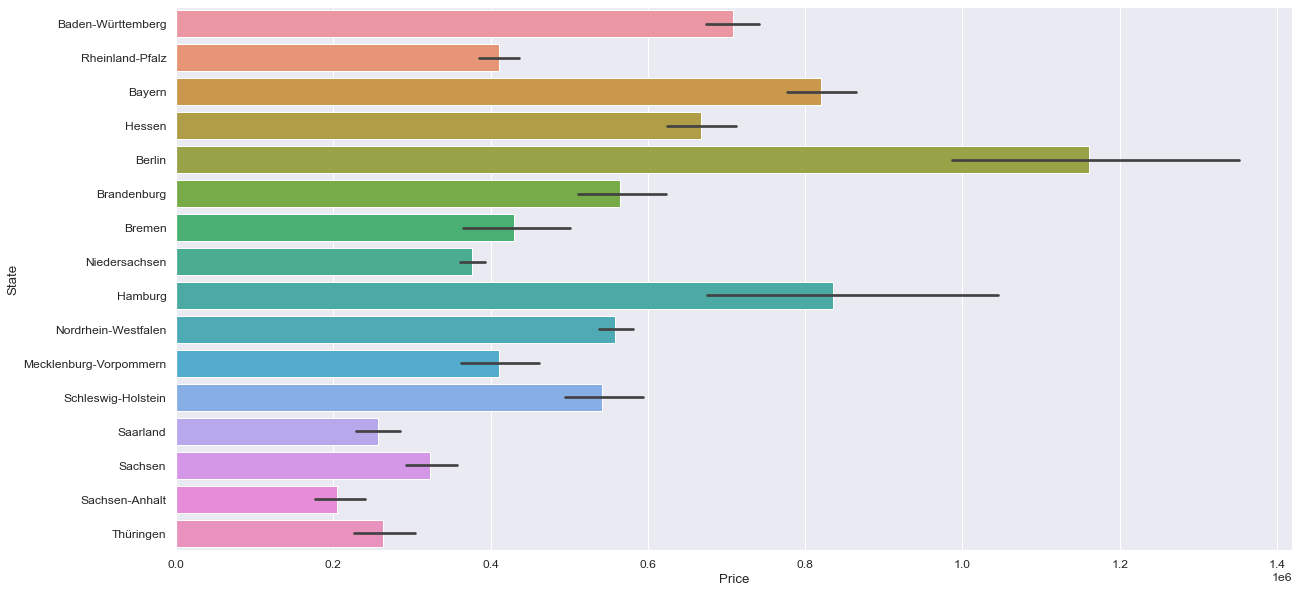

In [24]:
sns.barplot(x='Price', y='State', data=germany)

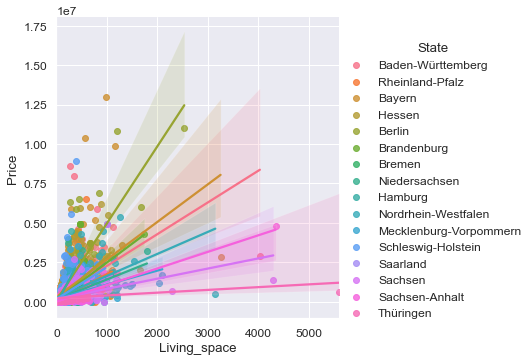

In [25]:
sns.lmplot(x='Living_space', y='Price', hue='State', data=germany)

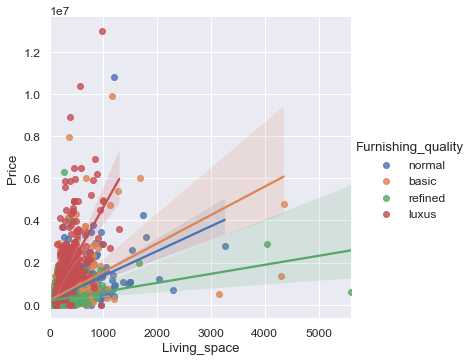

In [26]:
sns.lmplot(x='Living_space', y='Price', hue='Furnishing_quality', data=germany)

In [27]:
print("Missing Data : \n\n", germany.isnull().sum())

Missing Data : 

 Price                         0
Type                        402
Living_space                  0
Lot                           0
Usable_area                4984
Free_of_Relation           3569
Rooms                         0
Bedrooms                   3674
Bathrooms                  1801
Floors                     2664
Year_built                  694
Furnishing_quality         2726
Year_renovated             5203
Condition                   323
Heating                     584
Energy_source              1227
Energy_certificate          755
Energy_certificate_type    3526
Energy_consumption         8119
Energy_efficiency_class    4819
State                         1
City                          1
Place                       290
Garages                    1960
Garagetype                 1960
dtype: int64


In [28]:
#The missing values are replaced be 0 for the columns given in the array
col_to_fill_zero = ['Usable_area', 'Free_of_Relation', 'Bedrooms', 'Bathrooms', 'Floors', 'Furnishing_quality', 'Year_renovated', 'Energy_source', 'Energy_certificate_type', 'Energy_consumption', 'Energy_efficiency_class']

germany[col_to_fill_zero] = germany[col_to_fill_zero].fillna(0)

In [29]:
germany['Year_built'] = germany['Year_built'].fillna(germany.Year_built.mean())
germany['Garages'] = germany['Garages'].fillna(germany.Garages.mean())

In [30]:
print("Missing Data : \n\n", germany.isnull().sum())

Missing Data : 

 Price                         0
Type                        402
Living_space                  0
Lot                           0
Usable_area                   0
Free_of_Relation              0
Rooms                         0
Bedrooms                      0
Bathrooms                     0
Floors                        0
Year_built                    0
Furnishing_quality            0
Year_renovated                0
Condition                   323
Heating                     584
Energy_source                 0
Energy_certificate          755
Energy_certificate_type       0
Energy_consumption            0
Energy_efficiency_class       0
State                         1
City                          1
Place                       290
Garages                       0
Garagetype                 1960
dtype: int64


In [31]:
#Drop the remaining variables
germany.dropna(inplace=True)

In [32]:
print("Missing Data : \n\n", germany.isnull().sum())

Missing Data : 

 Price                      0
Type                       0
Living_space               0
Lot                        0
Usable_area                0
Free_of_Relation           0
Rooms                      0
Bedrooms                   0
Bathrooms                  0
Floors                     0
Year_built                 0
Furnishing_quality         0
Year_renovated             0
Condition                  0
Heating                    0
Energy_source              0
Energy_certificate         0
Energy_certificate_type    0
Energy_consumption         0
Energy_efficiency_class    0
State                      0
City                       0
Place                      0
Garages                    0
Garagetype                 0
dtype: int64


<AxesSubplot:>

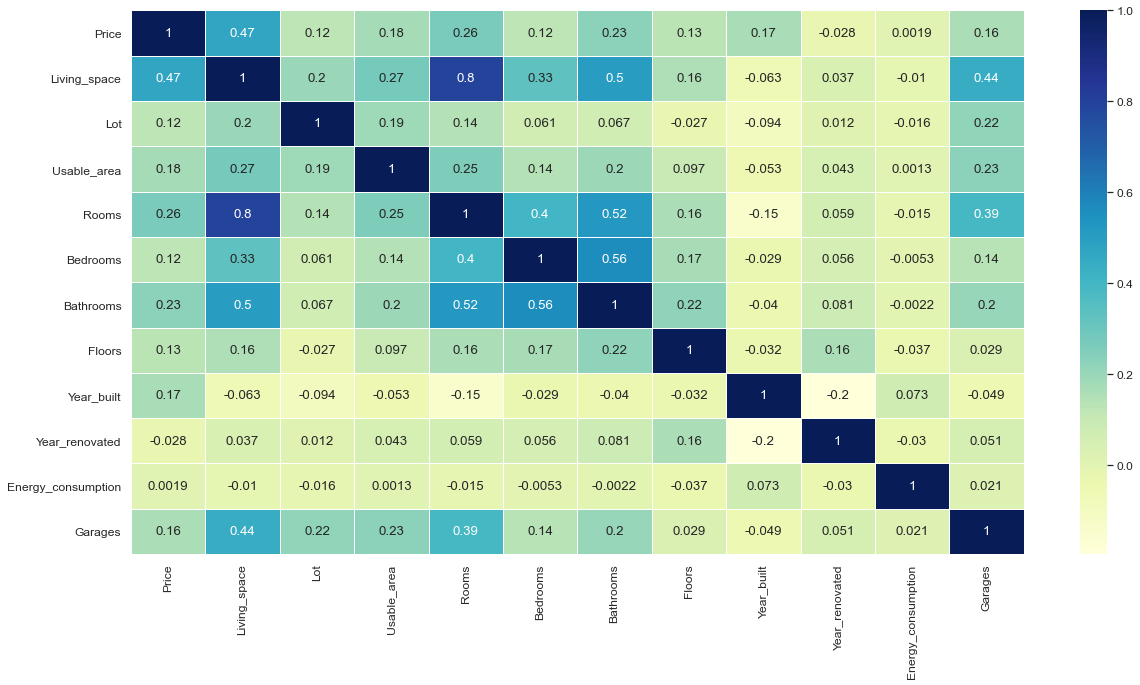

In [33]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)
sns.heatmap(germany.corr(),linewidths=0.5,annot=True,cmap='YlGnBu')

In [35]:
# get dummy variables for categorical features for linear regression
df = germany.copy()
df = pd.get_dummies(df, columns=['Type','Free_of_Relation','Furnishing_quality','Condition','Heating','Energy_source','Energy_certificate','Energy_certificate_type','Energy_efficiency_class','State','City','Place','Garagetype'])

In [36]:
df

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,...,Place_Überlingen,Place_Ückendorf,Place_Ürzig,Garagetype_Car park lot,Garagetype_Carport,Garagetype_Duplex lot,Garagetype_Garage,Garagetype_Outside parking lot,Garagetype_Parking lot,Garagetype_Underground parking lot
0,498000.0,106.00,229.0,0.00,5.5,3.0,1.0,2.0,2005.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,495000.0,140.93,517.0,20.00,6.0,3.0,2.0,0.0,1994.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,749000.0,162.89,82.0,37.62,5.0,3.0,2.0,4.0,2013.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,259000.0,140.00,814.0,0.00,4.0,0.0,2.0,2.0,1900.0,2000.0,...,0,0,0,0,0,0,1,0,0,0
4,469000.0,115.00,244.0,0.00,4.5,2.0,1.0,0.0,1968.0,2019.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10545,2900000.0,447.00,2168.0,150.00,7.0,4.0,4.0,2.0,2000.0,2010.0,...,0,0,0,0,0,0,0,0,0,1
10546,1990000.0,220.00,380.0,69.00,6.0,5.0,3.0,2.0,2009.0,2019.0,...,0,0,0,0,0,0,1,0,0,0
10547,1495000.0,167.00,683.0,63.00,6.5,4.0,3.0,0.0,1976.0,2015.0,...,0,0,0,0,0,0,1,0,0,0
10548,449000.0,222.00,4000.0,0.00,6.0,5.0,3.0,1.0,2017.0,2020.0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7003 entries, 0 to 10551
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    7003 non-null   float64
 1   Type                     7003 non-null   object 
 2   Living_space             7003 non-null   float64
 3   Lot                      7003 non-null   float64
 4   Usable_area              7003 non-null   float64
 5   Free_of_Relation         7003 non-null   object 
 6   Rooms                    7003 non-null   float64
 7   Bedrooms                 7003 non-null   float64
 8   Bathrooms                7003 non-null   float64
 9   Floors                   7003 non-null   float64
 10  Year_built               7003 non-null   float64
 11  Furnishing_quality       7003 non-null   object 
 12  Year_renovated           7003 non-null   float64
 13  Condition                7003 non-null   object 
 14  Heating                

In [42]:
X = df.drop('Price', axis = 'columns')
y = df.Price

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression(n_jobs=-1)
LR.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

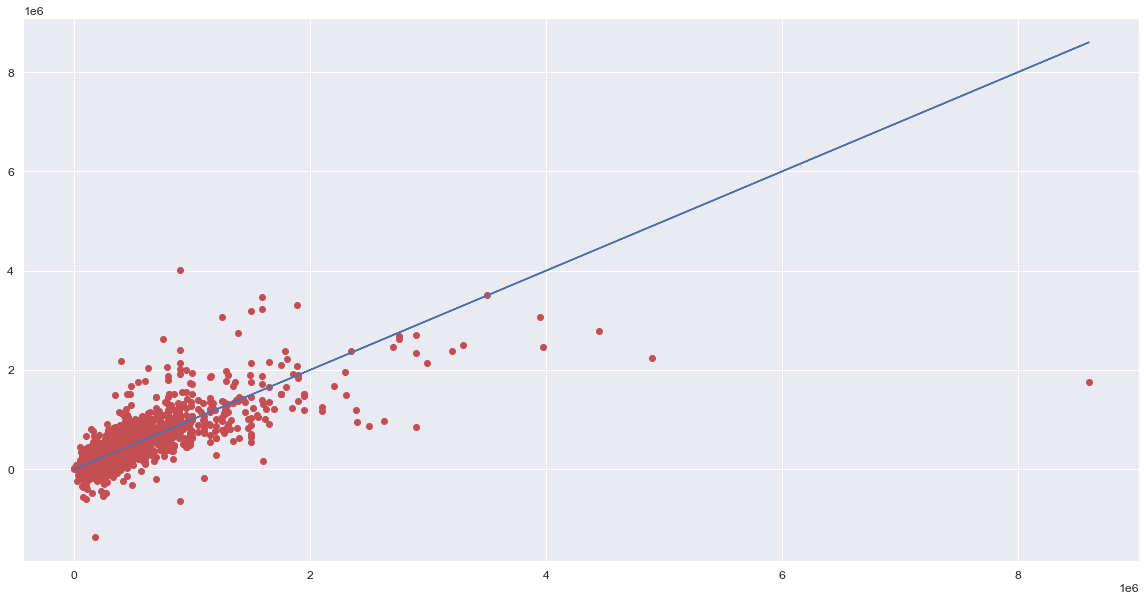

In [45]:
y_pred=LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [46]:
df.head()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,...,Place_Überlingen,Place_Ückendorf,Place_Ürzig,Garagetype_Car park lot,Garagetype_Carport,Garagetype_Duplex lot,Garagetype_Garage,Garagetype_Outside parking lot,Garagetype_Parking lot,Garagetype_Underground parking lot
0,498000.0,106.00,229.0,0.00,5.5,3.0,1.0,2.0,2005.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,495000.0,140.93,517.0,20.00,6.0,3.0,2.0,0.0,1994.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,749000.0,162.89,82.0,37.62,5.0,3.0,2.0,4.0,2013.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,259000.0,140.00,814.0,0.00,4.0,0.0,2.0,2.0,1900.0,2000.0,...,0,0,0,0,0,0,1,0,0,0
4,469000.0,115.00,244.0,0.00,4.5,2.0,1.0,0.0,1968.0,2019.0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
#Evaluating the model by calculating performance metrics
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Accuracy using Linear Regression : ",LR.score(X_test,y_test)*100,"%")

229209.83502703838
160959052322.04935
401197.02431853773
Accuracy using Linear Regression :  42.16422050681875 %


In [48]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [49]:
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
y_pred_dt = reg.predict(X_test)

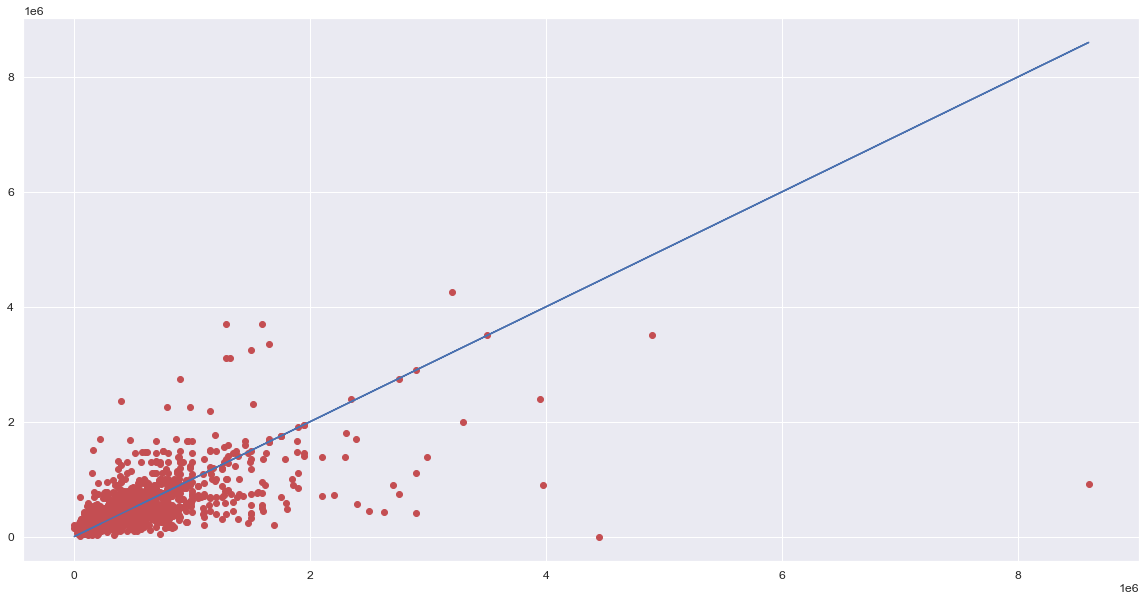

In [50]:
y_pred = reg.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [51]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Accuracy using Decision Tree : ",reg.score(X_test,y_test)*100,"%")

236632.32912919344
203070215233.13736
450633.127092469
Accuracy using Decision Tree :  27.032844562494297 %


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [53]:
%timeit
param_grid={'n_estimators':np.arange(21,101)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2,n_jobs=-1, verbose=50)
tree.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 25.6min
[Paralle

GridSearchCV(cv=2, estimator=RandomForestRegressor(warm_start=True), n_jobs=-1,
             param_grid={'n_estimators': array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100])},
             verbose=50)

In [54]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)

In [55]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

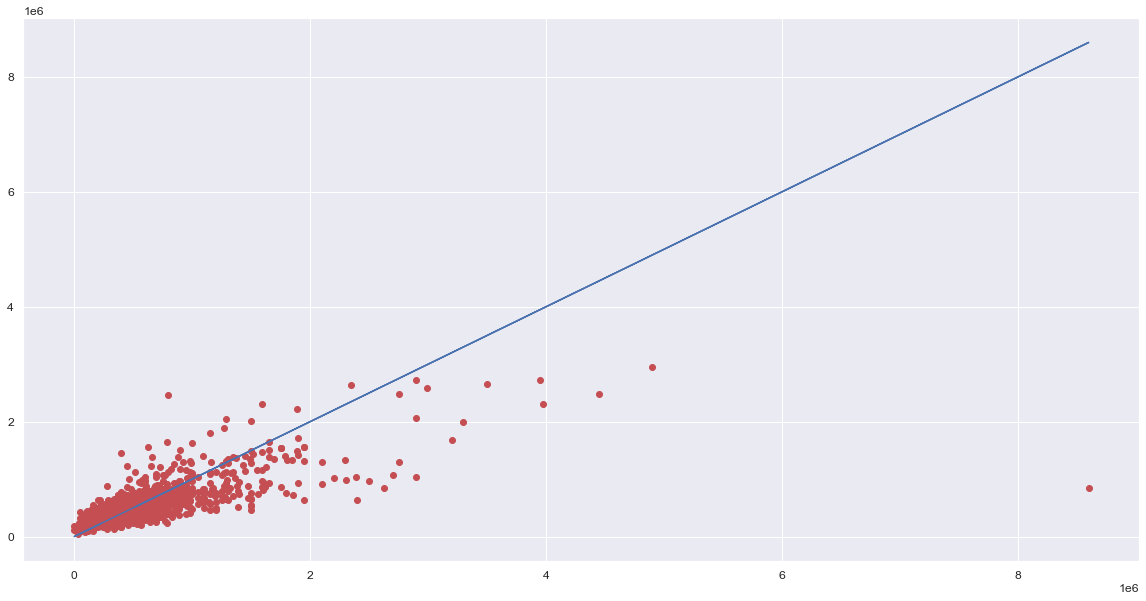

In [56]:
y_pred=RFregressor.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [57]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Accuracy using Random Forest Regression : ",RFregressor.score(X_test,y_test)*100,"%")

176718.46244975016
124424058967.42778
352737.946594108
Accuracy using Random Forest Regression :  55.291968147970074 %


In [58]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
ypred = rr.predict(X_test)

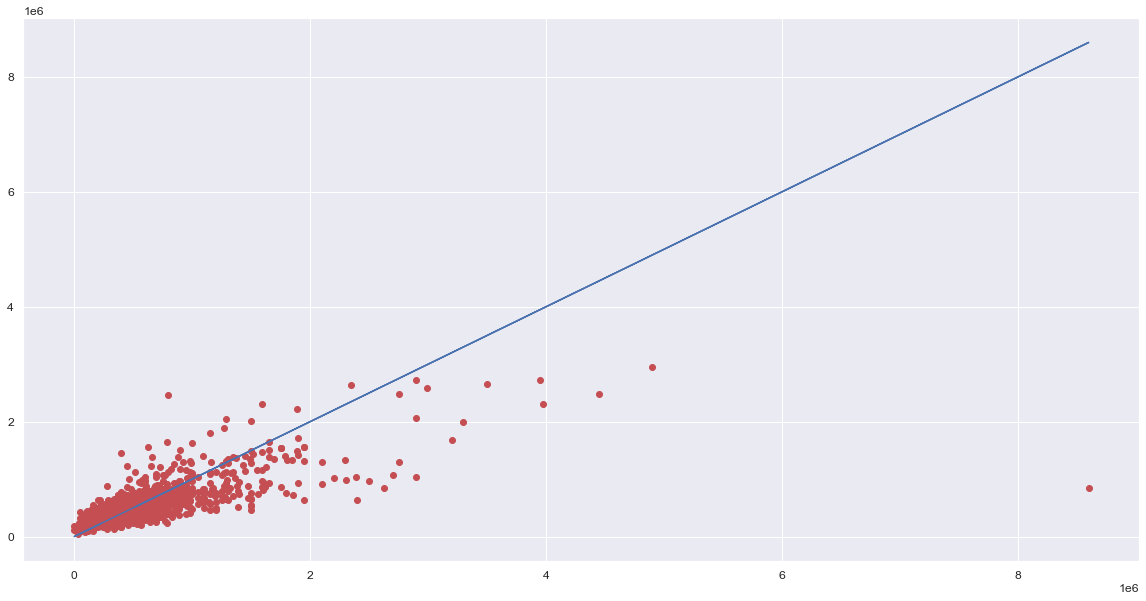

In [59]:
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [60]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Accuracy using Ridge Linear Regression : ",rr.score(X_test,y_test)*100,"%")

176718.46244975016
124424058967.42778
352737.946594108
Accuracy using Ridge Linear Regression :  43.82787771808416 %


In [61]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test)

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74811425574535.84, tolerance: 182078537747.15955
  model = cd_fast.enet_coordinate_descent(


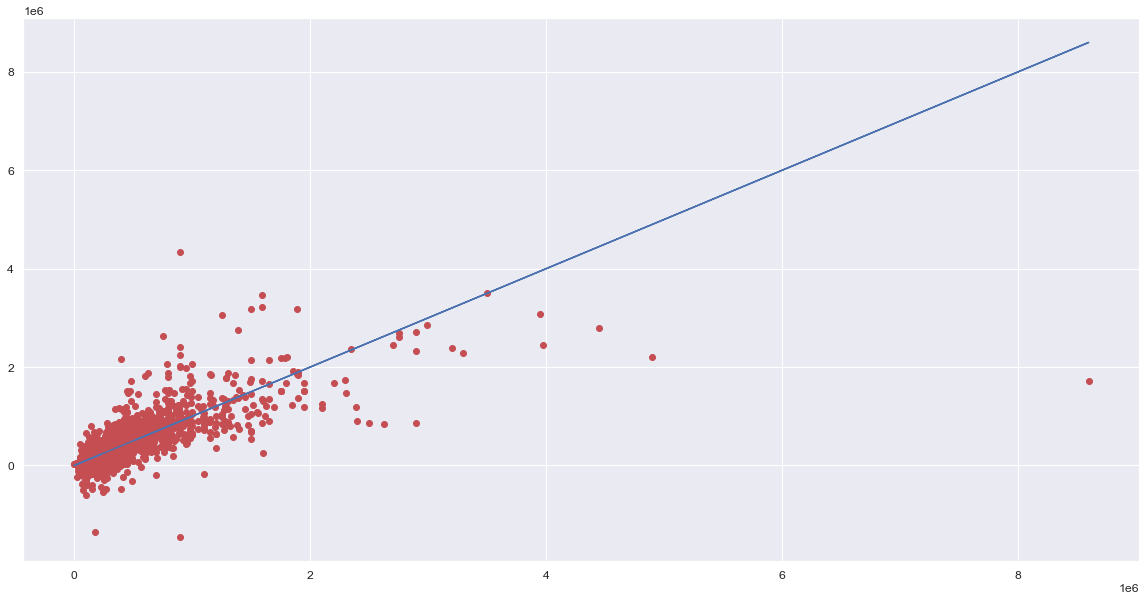

In [62]:
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [63]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Accuracy using Lasso Regression : ",lasso.score(X_test,y_test)*100,"%")

230520.84821396432
166229281625.17328
407712.253464589
Accuracy using Lasso Regression :  40.270522603801076 %


In [64]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha = 0.01)
enet.fit(X_train, y_train) 
y_pred = enet.predict(X_test)

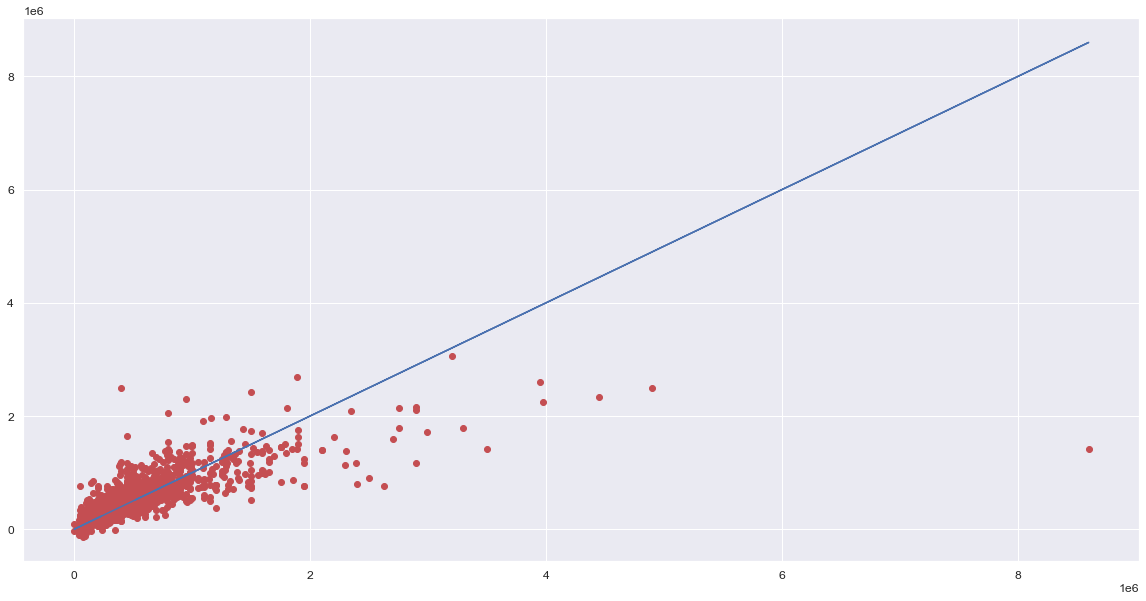

In [65]:
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [66]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Accuracy using Elastic Net Regression : ",enet.score(X_test,y_test)*100,"%")

186601.3932578467
125590373396.48145
354387.32115650165
Accuracy using Elastic Net Regression :  54.87288824432166 %
